In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [187]:
def plot_decomposicao_serie_temporal(dataframe, coluna_serie_temporal):
    # Decomposição da série temporal
    decomposition = sm.tsa.seasonal_decompose(dataframe[coluna_serie_temporal], model='addtivie', period=6)

    # Plotar as componentes
    plt.figure(figsize=(20, 8))

    plt.subplot(411)
    plt.plot(dataframe[coluna_serie_temporal], label='Série Temporal Original')
    plt.legend(loc='upper left')
    plt.xlim(0, 200)

    plt.subplot(412)
    plt.plot(decomposition.trend, label='Tendência')
    plt.legend(loc='upper left')

    plt.subplot(413)
    plt.xticks(np.arange(0, 51, 1))
    plt.plot(decomposition.seasonal, label='Sazonalidade')
    plt.legend(loc='upper left')
    plt.xlim(0, 50)

    plt.subplot(414)
    plt.plot(decomposition.resid, label='Erro (Resíduo)')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

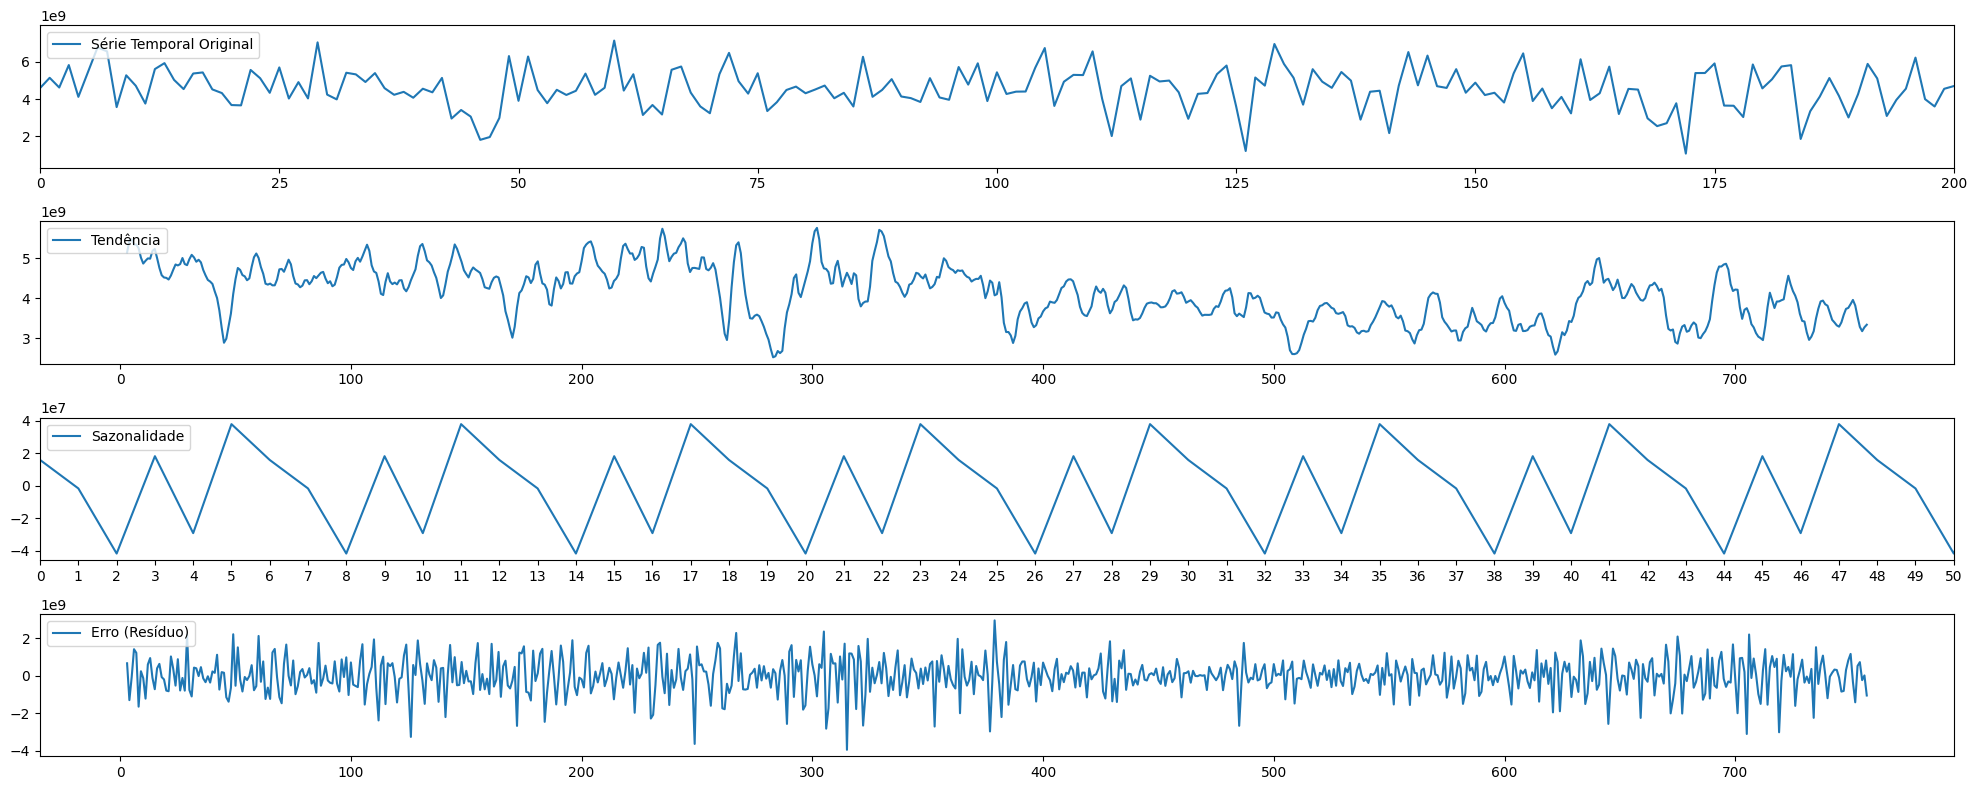

In [188]:
vazao_mg_rs = pd.read_csv("../../datasets/originais/vazao/26-06-2023/bbr/bbr esmond data mg-rs 06-26-2023.csv")
plot_decomposicao_serie_temporal(vazao_mg_rs, 'Vazao')

In [189]:
from statsmodels.tsa.seasonal import STL

In [190]:
def plot_decomposicao_serie_temporal(dataframe, coluna_serie_temporal):
    # Decomposição da série temporal
    stl = STL(dataframe[coluna_serie_temporal])
    decomposition = stl.fit()

    # Plotar as componentes
    plt.figure(figsize=(20, 8))

    plt.subplot(411)
    plt.plot(dataframe[coluna_serie_temporal], label='Série Temporal Original')
    plt.legend(loc='upper left')
    plt.xlim(0, 200)

    plt.subplot(412)
    plt.plot(decomposition.trend, label='Tendência')
    plt.legend(loc='upper left')

    plt.subplot(413)
    plt.xticks(np.arange(0, 51, 1))
    plt.plot(decomposition.seasonal, label='Sazonalidade')
    plt.legend(loc='upper left')
    plt.xlim(0, 50)

    plt.subplot(414)
    plt.plot(decomposition.resid, label='Erro (Resíduo)')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

In [191]:
vazao_mg_rs = pd.read_csv("../../datasets/originais/vazao/26-06-2023/bbr/bbr esmond data mg-rs 06-26-2023.csv")
plot_decomposicao_serie_temporal(vazao_mg_rs, 'Vazao')

ValueError: Unable to determine period from endog

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

def plot_decomposicao_serie_temporal(dataframe, coluna_serie_temporal, periodo_sazonal):
    # Decomposição da série temporal
    stl = STL(dataframe[coluna_serie_temporal], seasonal=periodo_sazonal)
    decomposition = stl.fit()

    # Plotar as componentes
    plt.figure(figsize=(20, 8))

    plt.subplot(411)
    plt.plot(dataframe[coluna_serie_temporal], label='Série Temporal Original')
    plt.legend(loc='upper left')
    plt.xlim(0, 200)

    plt.subplot(412)
    plt.plot(decomposition.trend, label='Tendência')
    plt.legend(loc='upper left')

    plt.subplot(413)
    plt.xticks(np.arange(0, len(dataframe), 1))
    plt.plot(decomposition.seasonal, label='Sazonalidade')
    plt.legend(loc='upper left')
    plt.xlim(0, len(dataframe))

    plt.subplot(414)
    plt.plot(decomposition.resid, label='Erro (Resíduo)')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# Experimente diferentes valores para 'seu_valor'
seu_valor = 9
vazao_mg_rs = pd.read_csv("../../datasets/originais/vazao/26-06-2023/bbr/bbr esmond data mg-rs 06-26-2023.csv")
plot_decomposicao_serie_temporal(vazao_mg_rs, 'Vazao', seu_valor)


ValueError: Unable to determine period from endog

In [ ]:
import pandas as pd
from scipy.stats import kruskal
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

def kruskal_wallis_test(dataframe, coluna_serie_temporal, periodo_sazonal):
    # Decomposição da série temporal
    dataframe['Timestamp'] = pd.to_datetime(dataframe['Timestamp'], unit='s')
    # Calcular a média da componente sazonal para cada mês
    dataframe['Weekday'] = dataframe['Timestamp'].dt.weekday

    # Calcular a média da componente sazonal para cada dia da semana
    mean_seasonal_by_weekday = dataframe.groupby('Weekday')[coluna_serie_temporal].mean()

    # Realizar o teste de Kruskal-Wallis
    statistic, p_value = kruskal(*[group[1] for group in mean_seasonal_by_weekday.groupby('Weekday')])


    return statistic, p_value

# Substitua 'seu_valor' pelo período sazonal real
seu_valor = 6
vazao_mg_rs = pd.read_csv("../../datasets/originais/vazao/26-06-2023/bbr/bbr esmond data mg-rs 06-26-2023.csv")
statistic, p_value = kruskal_wallis_test(vazao_mg_rs, 'Vazao', seu_valor)

print(f'Estatística do teste de Kruskal-Wallis: {statistic}')

print(f'Valor p: {p_value}')

# Adicione lógica para interpretar o resultado (rejeição ou não da hipótese nula)


Estatística do teste de Kruskal-Wallis: 6.0
Valor p: 0.42319008112684364


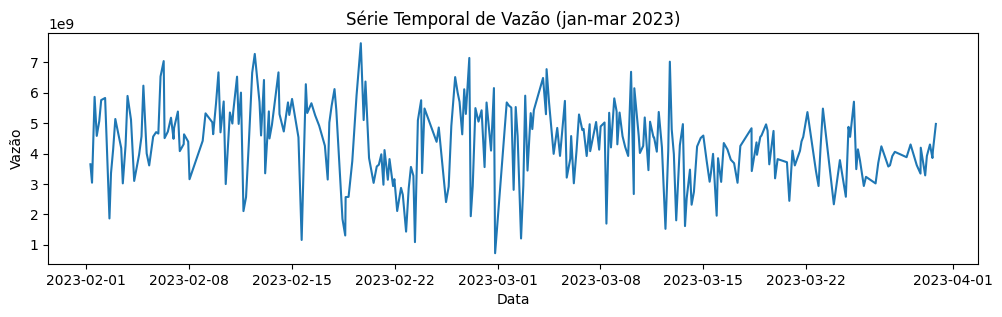

In [192]:
df = pd.read_csv("../../datasets/originais/vazao/26-06-2023/bbr/bbr esmond data mg-rs 06-26-2023.csv", parse_dates=['Data'])

start_date = '2023-02-01'
end_date = '2023-03-31'
df_filtered = df[(df['Data'] >= start_date) & (df['Data'] <= end_date)]

# Visualize os dados ao longo do tempo
plt.figure(figsize=(12, 3))
plt.plot(df_filtered['Data'], df_filtered['Vazao'])
plt.title('Série Temporal de Vazão (jan-mar 2023)')
plt.xlabel('Data')
plt.ylabel('Vazão')
plt.show()

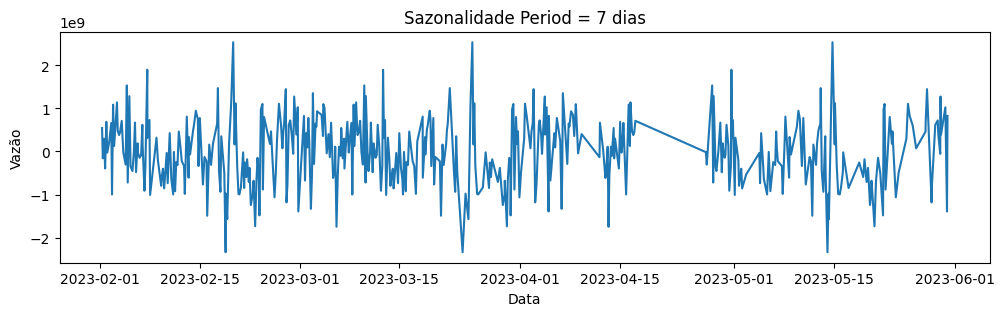

In [199]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Crie um DataFrame
df = pd.read_csv("../../datasets/originais/vazao/26-06-2023/bbr/bbr esmond data mg-rs 06-26-2023.csv", parse_dates=['Data'])

# Filtre os dados para o período desejado
start_date = '2023-02-01'
end_date = '2023-05-31'
df_filtered = df[(df['Data'] >= start_date) & (df['Data'] <= end_date)]

# Adicione uma coluna de índice ao DataFrame
df_filtered.set_index('Data', inplace=True)

# Decomposição sazonal
result = seasonal_decompose(df_filtered['Vazao'], model='additive', period=(42*4))

# Combine sazonalidade e resíduos
seasonal_residuals = result.seasonal 

# Visualize sazonalidade + resíduos
plt.figure(figsize=(12, 3))
plt.plot(seasonal_residuals)
plt.title('Sazonalidade Period = 7 dias')
plt.xlabel('Data')
plt.ylabel('Vazão')
plt.show()

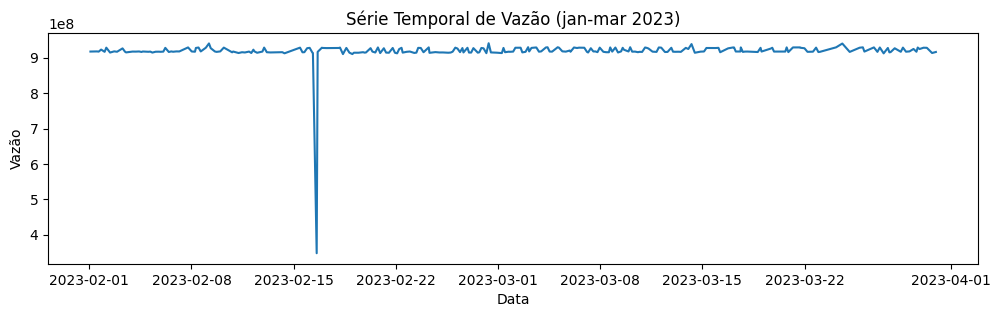

In [ ]:
df = pd.read_csv("../../datasets/originais/vazao/26-06-2023/bbr/bbr esmond data ce-sp 06-26-2023.csv", parse_dates=['Data'])

start_date = '2023-02-01'
end_date = '2023-03-31'
df_filtered = df[(df['Data'] >= start_date) & (df['Data'] <= end_date)]

# Visualize os dados ao longo do tempo
plt.figure(figsize=(12, 3))
plt.plot(df_filtered['Data'], df_filtered['Vazao'])
plt.title('Série Temporal de Vazão (jan-mar 2023)')
plt.xlabel('Data')
plt.ylabel('Vazão')
plt.show()

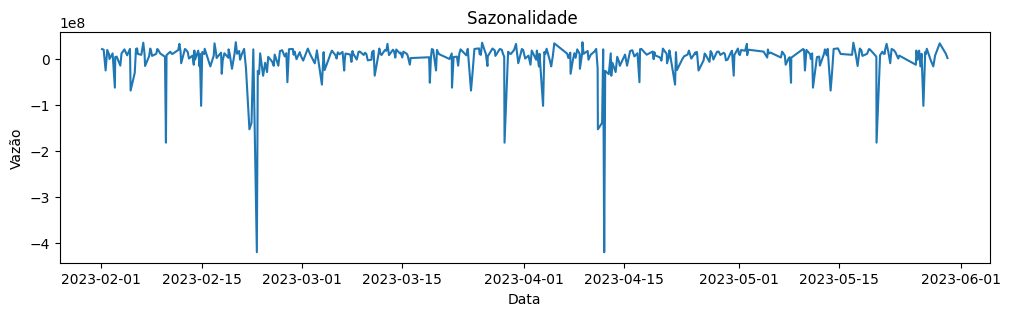

In [206]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Crie um DataFrame
df = pd.read_csv("../../datasets/originais/vazao/26-06-2023/bbr/bbr esmond data pa-ba 06-26-2023.csv", parse_dates=['Data'])

# Filtre os dados para o período desejado
start_date = '2023-02-01'
end_date = '2023-05-31'
df_filtered = df[(df['Data'] >= start_date) & (df['Data'] <= end_date)]

# Adicione uma coluna de índice ao DataFrame
df_filtered.set_index('Data', inplace=True)

# Decomposição sazonal
result = seasonal_decompose(df_filtered['Vazao'], model='additive', period=168)

# Combine sazonalidade e resíduos
seasonal_residuals = result.seasonal 

# Visualize sazonalidade + resíduos
plt.figure(figsize=(12, 3))
plt.plot(seasonal_residuals)
plt.title('Sazonalidade ')
plt.xlabel('Data')
plt.ylabel('Vazão')
plt.show()

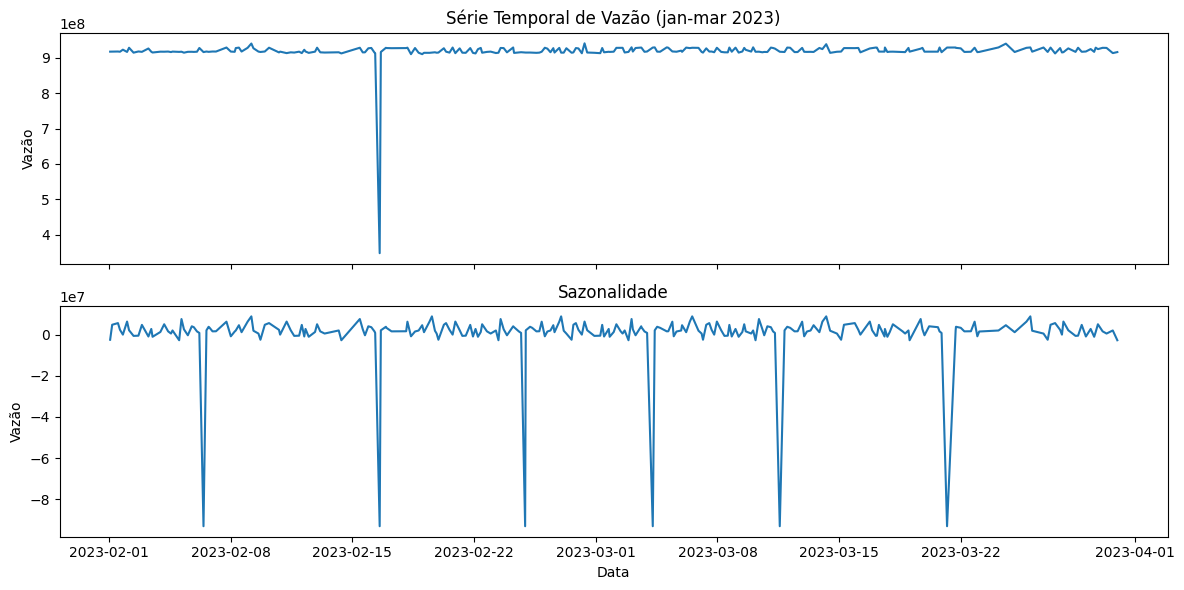

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Carregue os dados
df = pd.read_csv("../../datasets/originais/vazao/26-06-2023/bbr/bbr esmond data ce-sp 06-26-2023.csv", parse_dates=['Data'])

# Filtre os dados para o período desejado
start_date = '2023-02-01'
end_date = '2023-03-31'
df_filtered = df[(df['Data'] >= start_date) & (df['Data'] <= end_date)]

# Visualize os dados ao longo do tempo
fig, axs = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# Subplot 1: Série Temporal de Vazão
axs[0].plot(df_filtered['Data'], df_filtered['Vazao'])
axs[0].set_title('Série Temporal de Vazão (jan-mar 2023)')
axs[0].set_ylabel('Vazão')

# Subplot 2: Sazonalidade
# Adicione uma coluna de índice ao DataFrame
df_filtered.set_index('Data', inplace=True)
# Decomposição sazonal
result = seasonal_decompose(df_filtered['Vazao'], model='additive', period=42)
# Combine sazonalidade e resíduos
seasonal_residuals = result.seasonal 
# Visualize sazonalidade + resíduos
axs[1].plot(seasonal_residuals)
axs[1].set_title('Sazonalidade')
axs[1].set_xlabel('Data')
axs[1].set_ylabel('Vazão')

plt.tight_layout()
plt.show()
